<a href="https://colab.research.google.com/github/oshmita26/Handwritten-Digit-Classifier/blob/main/Handwritten_digit_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries
import tensorflow as tf

In [2]:
# importing the dataset
mnist = tf.keras.datasets.mnist

In [4]:
# Divide the datset into train and test dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
# how does the data look
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [7]:
# Data visualization
import matplotlib.pyplot as plt

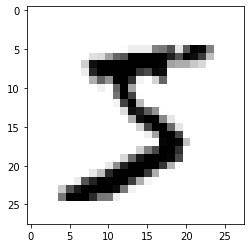

In [8]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [9]:
print(y_train[0])

5


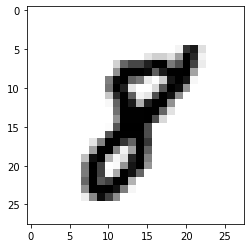

In [10]:
plt.imshow(x_train[17], cmap=plt.cm.binary)
plt.show()

In [11]:
print(y_train[17])

8


In [13]:
# Normalize the training set
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

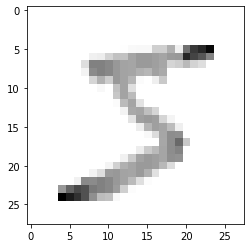

In [14]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [16]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [17]:
# Now create the sequential model
model = tf.keras.models.Sequential()

In [19]:
# Convert the input into 1*784
# We are going to flatten the images
model.add(tf.keras.layers.Flatten())

In [22]:
# Adding a few layers (hidden)
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

In [23]:
# Now add the output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))


In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2527 - accuracy: 0.9234
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1086 - accuracy: 0.9671
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0790 - accuracy: 0.9761


In [28]:
# Accuracy that we want will depend on the number of epochs
val_loss, val_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0980 - accuracy: 0.9700


In [29]:
predictions = model.predict(x_test)

In [30]:
print(predictions)

[[9.1660279e-09 5.1216184e-06 1.4705855e-05 ... 9.9989426e-01
  6.9723956e-07 8.0351529e-06]
 [5.2955289e-07 1.0351283e-05 9.9996388e-01 ... 1.1088949e-06
  8.9936628e-07 7.2933060e-09]
 [2.3978751e-06 9.9975580e-01 2.8150782e-06 ... 1.8441173e-05
  1.0358278e-04 1.0365397e-05]
 ...
 [8.8209632e-08 3.2803673e-06 2.7154588e-06 ... 3.8067915e-06
  1.3047639e-06 6.1941930e-05]
 [8.7188958e-08 4.6452460e-08 4.0908706e-08 ... 2.2202269e-07
  2.4450218e-04 3.4828352e-07]
 [1.0731038e-04 3.8603507e-06 5.5552268e-06 ... 5.8122911e-08
  6.9990169e-06 3.1711102e-06]]


In [31]:
import numpy as np
print(np.argmax(predictions[0]))

7


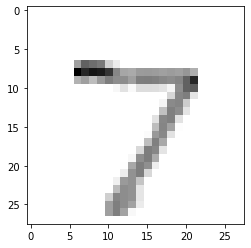

In [32]:
# Visualization once again
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()

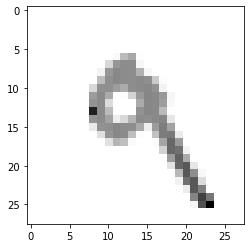

In [33]:
plt.imshow(x_test[7], cmap=plt.cm.binary)
plt.show()